 <h1 style="text-align: center;">Trabajo Practico 1: Metodos Computacionales</h1>
 <h2 style= "text-align: center">Estanislao Ríos Zgaib e Isabel Núñez </h2>

### Ejercicio 1 


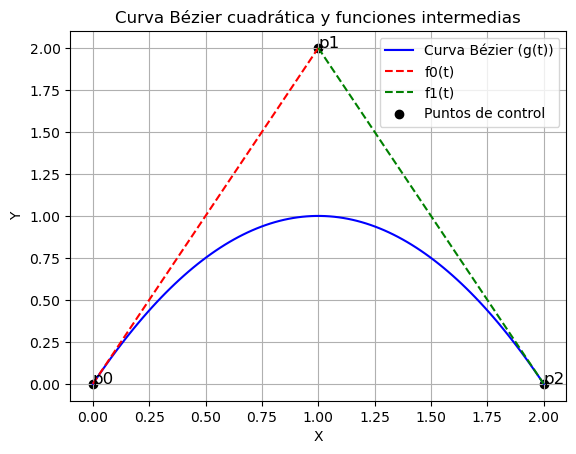

In [4]:
#parte 1
import numpy as np
import matplotlib.pyplot as plt

# Definir función de Bézier cuadrática
def bezier_quadratic(t, p0, p1, p2):
    return (1 - t)**2 * np.array(p0) + 2 * (1 - t) * t * np.array(p1) + t**2 * np.array(p2)

# Definir función f0 y f1
def f0(t, p0, p1):
    return (1 - t) * np.array(p0) + t * np.array(p1)

def f1(t, p1, p2):
    return (1 - t) * np.array(p1) + t * np.array(p2)

# Puntos de control
p0 = [0, 0]
p1 = [1, 2]
p2 = [2, 0]

# Valores de t
t_vals = np.linspace(0, 1, 100)

# Cálculo de curvas
bezier_curve = [bezier_quadratic(t, p0, p1, p2) for t in t_vals]
f0_curve = [f0(t, p0, p1) for t in t_vals]
f1_curve = [f1(t, p1, p2) for t in t_vals]

# Conversión a arrays
bezier_curve = np.array(bezier_curve)
f0_curve = np.array(f0_curve)
f1_curve = np.array(f1_curve)

# Gráfico de las curvas
plt.plot(bezier_curve[:, 0], bezier_curve[:, 1], label="Curva Bézier (g(t))", color='blue')
plt.plot(f0_curve[:, 0], f0_curve[:, 1], '--', label="f0(t)", color='red')
plt.plot(f1_curve[:, 0], f1_curve[:, 1], '--', label="f1(t)", color='green')
plt.scatter([p0[0], p1[0], p2[0]], [p0[1], p1[1], p2[1]], color='black', label="Puntos de control")

# Etiquetas y texto
plt.title('Curva Bézier cuadrática y funciones intermedias')
plt.text(p0[0], p0[1], "p0", fontsize=12)
plt.text(p1[0], p1[1], "p1", fontsize=12)
plt.text(p2[0], p2[1], "p2", fontsize=12)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


Ejercicio 2

In [5]:
# Función que calcula los coeficientes de los puntos de control para una curva de Bézier cúbica
def bezier_coefficients(t):
    return (1 - t)**3, 3 * t * (1 - t)**2, 3 * t**2 * (1 - t), t**3

# Valores de t a comparar
t_values = [0.3, 0.5, 0.8]

for t in t_values:
    c0, c1, c2, c3 = bezier_coefficients(t)
    print(f"t = {t}: Coeficientes = ({c0:.2f}, {c1:.2f}, {c2:.2f}, {c3:.2f}) -> Suma = {c0 + c1 + c2 + c3:.2f}")


t = 0.3: Coeficientes = (0.34, 0.44, 0.19, 0.03) -> Suma = 1.00
t = 0.5: Coeficientes = (0.12, 0.38, 0.38, 0.12) -> Suma = 1.00
t = 0.8: Coeficientes = (0.01, 0.10, 0.38, 0.51) -> Suma = 1.00


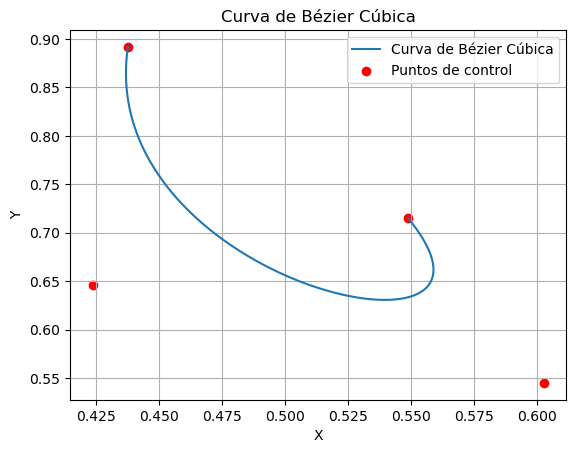

In [6]:
#parte2
# Función para calcular h(t) en función de los 4 puntos de control
def bezier_cubica(t, puntos_control):
    p0, p1, p2, p3 = puntos_control
    h_t = (1 - t)**3 * p0 + 3 * t * (1 - t)**2 * p1 + 3 * t**2 * (1 - t) * p2 + t**3 * p3
    return h_t

# Generar un conjunto de puntos de control aleatoriamente
np.random.seed(0)  # Fijar semilla para reproducibilidad
puntos_control = np.random.rand(4, 2)

# Generar valores de t
t_values = np.linspace(0, 1, 100)

# Calcular los valores de h(t) para cada t
bezier_curve = np.array([bezier_cubica(t, puntos_control) for t in t_values])

# Graficar la curva de Bézier cúbica junto con los puntos de control
plt.plot(bezier_curve[:, 0], bezier_curve[:, 1], label='Curva de Bézier Cúbica')
plt.scatter(puntos_control[:, 0], puntos_control[:, 1], color='red', label='Puntos de control')

# Añadir etiquetas y leyenda
plt.title('Curva de Bézier Cúbica')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


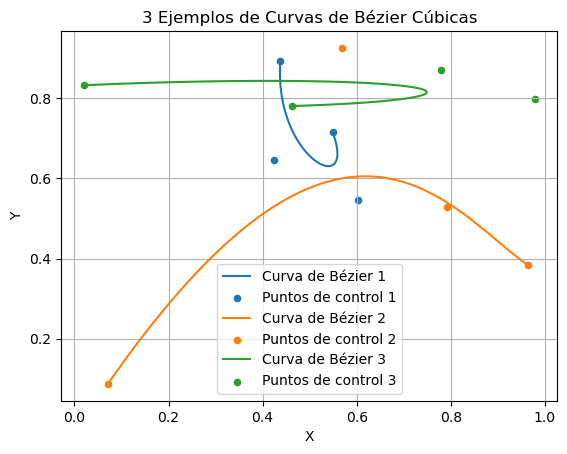

In [7]:
#parte 3

# Funciones para calcular los coeficientes de la curva de Bézier cúbica
def coef_p3(t):
    return t**3

def coef_p2(t):
    return 3*t**2 - 3*t**3

def coef_p1(t):
    return 3*t**3 - 6*t**2 + 3*t

def coef_p0(t):
    return 1 - 3*t + 3*t**2 - t**3

# Función para calcular h(t) utilizando los coeficientes
def h(t, puntos):
    p0, p1, p2, p3 = puntos
    return coef_p3(t)*p3 + coef_p2(t)*p2 + coef_p1(t)*p1 + coef_p0(t)*p0

# Generar 3 conjuntos de puntos de control aleatoriamente
np.random.seed(0)  # Fijar semilla para reproducibilidad
num_curvas = 3  # Número de ejemplos a generar
puntos_control_list = [np.random.rand(4, 2) for _ in range(num_curvas)]

# Generar valores de t
t_values = np.linspace(0, 1, 100)

# Graficar las 3 curvas de Bézier cúbicas
for i, puntos_control in enumerate(puntos_control_list):
    bezier_curve = np.array([h(t, puntos_control) for t in t_values])
    plt.plot(bezier_curve[:, 0], bezier_curve[:, 1], label=f'Curva de Bézier {i+1}')
    plt.scatter(puntos_control[:, 0], puntos_control[:, 1], label=f'Puntos de control {i+1}', s=20)

# Añadir etiquetas y leyenda
plt.title('3 Ejemplos de Curvas de Bézier Cúbicas')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


Ejercicio 4 

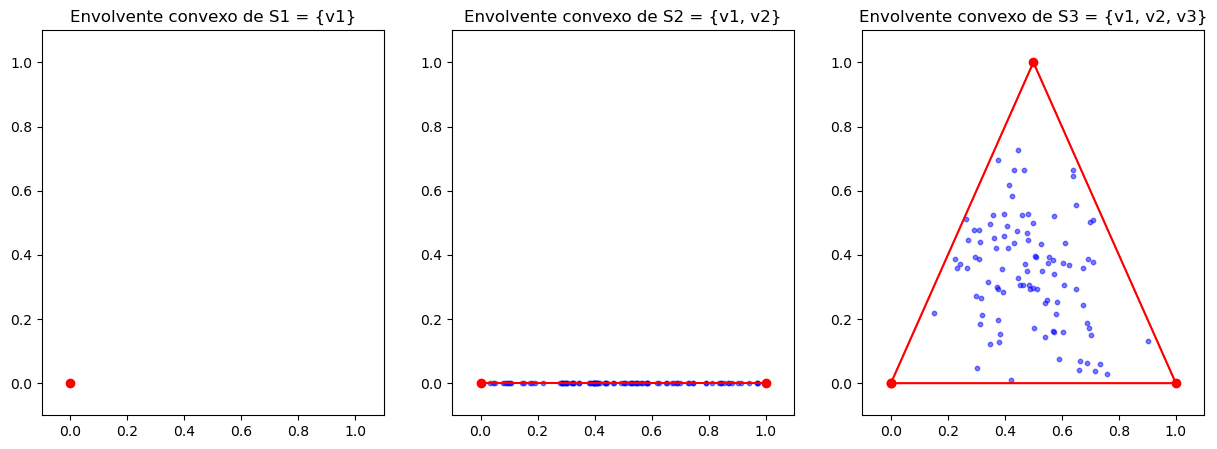

In [8]:
#parte 1
from matplotlib.patches import Polygon

# Definir los puntos de ejemplo en R^2
v1 = np.array([0, 0])
v2 = np.array([1, 0])
v3 = np.array([0.5, 1])

# Función para generar puntos aleatorios dentro de la envolvente convexo
def generar_puntos_convexos(vectores, num_puntos=100):
    puntos_convexos = []
    for _ in range(num_puntos):
        # Generar coeficientes aleatorios que suman 1
        coef = np.random.rand(len(vectores))
        coef /= np.sum(coef)  # Normalizar para que la suma sea 1
        # Generar la combinación convexa
        punto = np.sum([c * v for c, v in zip(coef, vectores)], axis=0)
        puntos_convexos.append(punto)
    return np.array(puntos_convexos)

# Visualización del envolvente convexo de S1, S2 y S3
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# S1 = {v1}
ax[0].plot(v1[0], v1[1], 'ro', label='v1')
ax[0].set_title("Envolvente convexo de S1 = {v1}")
ax[0].set_xlim([-0.1, 1.1])
ax[0].set_ylim([-0.1, 1.1])

# S2 = {v1, v2}
# Generar puntos dentro de la combinación convexa de v1 y v2
puntos_S2 = generar_puntos_convexos([v1, v2])
ax[1].scatter(puntos_S2[:, 0], puntos_S2[:, 1], s=10, color='blue', alpha=0.5, label='Puntos en conv(S2)')
ax[1].plot([v1[0], v2[0]], [v1[1], v2[1]], 'ro-')
ax[1].set_title("Envolvente convexo de S2 = {v1, v2}")
ax[1].set_xlim([-0.1, 1.1])
ax[1].set_ylim([-0.1, 1.1])

# S3 = {v1, v2, v3}
# Generar puntos dentro de la combinación convexa de v1, v2 y v3
puntos_S3 = generar_puntos_convexos([v1, v2, v3])
polygon = Polygon([v1, v2, v3], closed=True, fill=None, edgecolor='r')
ax[2].add_patch(polygon)
ax[2].scatter(puntos_S3[:, 0], puntos_S3[:, 1], s=10, color='blue', alpha=0.5, label='Puntos en conv(S3)')
ax[2].plot([v1[0], v2[0], v3[0], v1[0]], [v1[1], v2[1], v3[1], v1[1]], 'ro-')
ax[2].set_title("Envolvente convexo de S3 = {v1, v2, v3}")
ax[2].set_xlim([-0.1, 1.1])
ax[2].set_ylim([-0.1, 1.1])

plt.show()



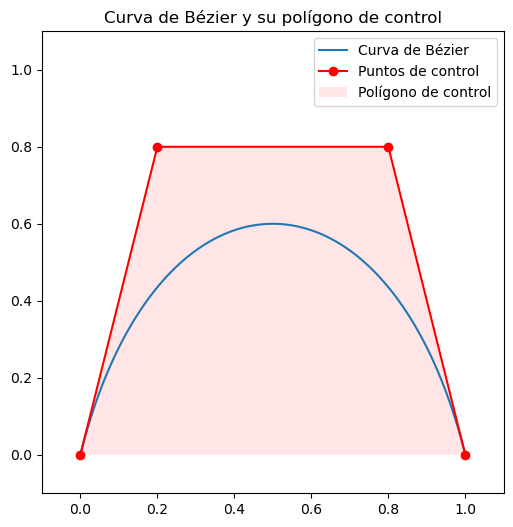

In [9]:
#parte 2
# Función para calcular la curva de Bézier cúbica
def bezier_curve(p0, p1, p2, p3, n=100):
    t = np.linspace(0, 1, n)  # Generar n valores de t entre 0 y 1
    # Calcular la curva de Bézier
    curve = (1 - t[:, np.newaxis])**3 * p0 + \
            3 * t[:, np.newaxis] * (1 - t[:, np.newaxis])**2 * p1 + \
            3 * t[:, np.newaxis]**2 * (1 - t[:, np.newaxis]) * p2 + \
            t[:, np.newaxis]**3 * p3
    return curve

# Puntos de control
p0 = np.array([0, 0])
p1 = np.array([0.2, 0.8])
p2 = np.array([0.8, 0.8])
p3 = np.array([1, 0])

# Calcular la curva de Bézier
curve = bezier_curve(p0, p1, p2, p3)

# Gráfico de la curva de Bézier y el polígono de control
plt.figure(figsize=(6, 6))
plt.plot(curve[:, 0], curve[:, 1], label="Curva de Bézier")
plt.plot([p0[0], p1[0], p2[0], p3[0]], [p0[1], p1[1], p2[1], p3[1]], 'ro-', label="Puntos de control")
plt.fill([p0[0], p1[0], p2[0], p3[0]], [p0[1], p1[1], p2[1], p3[1]], 'r', alpha=0.1, label="Polígono de control")
plt.title("Curva de Bézier y su polígono de control")
plt.legend()
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


Ejercicio 6 

In [10]:
#parte 1 

# Función para generar 4 puntos aleatorios en R^2
def generar_puntos_aleatorios():
    return np.random.rand(4, 2) * 10  # Genera 4 puntos aleatorios en el rango [0, 10]

# Función para calcular la curva de Bézier
def bezier(t, puntos):
    p0, p1, p2, p3 = puntos
    return (1 - t)**3 * p0 + 3 * (1 - t)**2 * t * p1 + 3 * (1 - t) * t**2 * p2 + t**3 * p3

# Generar dos conjuntos de puntos 
puntos1 = generar_puntos_aleatorios()
puntos2 = generar_puntos_aleatorios()

# Generar las curvas x(t) e y(t)
t_values = np.linspace(0, 1, 100)
curva1 = np.array([bezier(t, puntos1) for t in t_values])  # Curva x(t)
curva2 = np.array([bezier(t, puntos2) for t in t_values])  # Curva y(t)


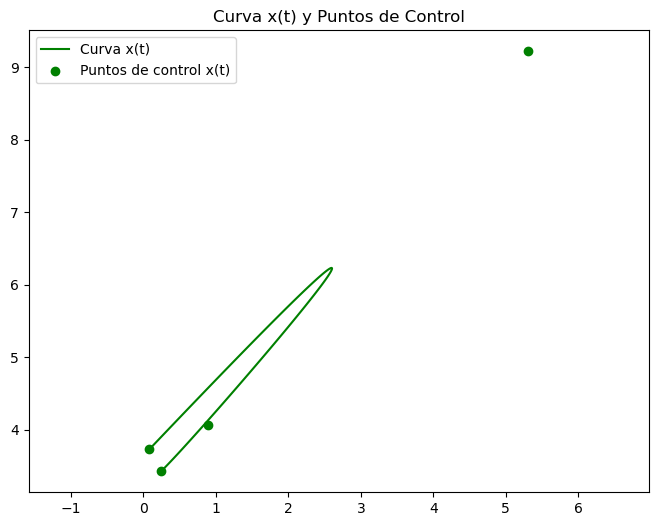

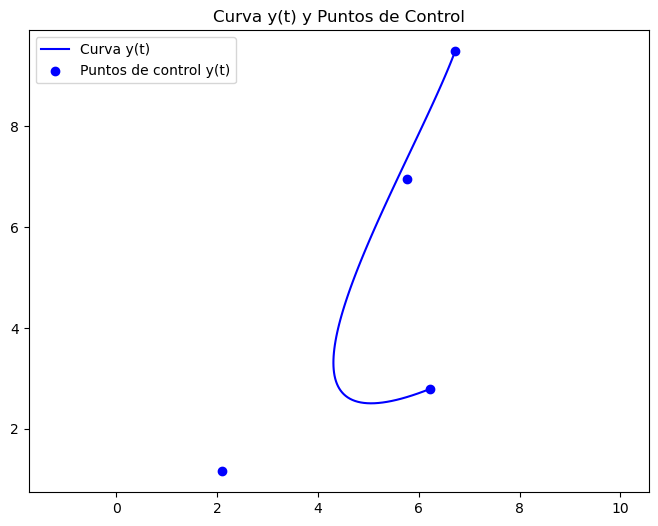

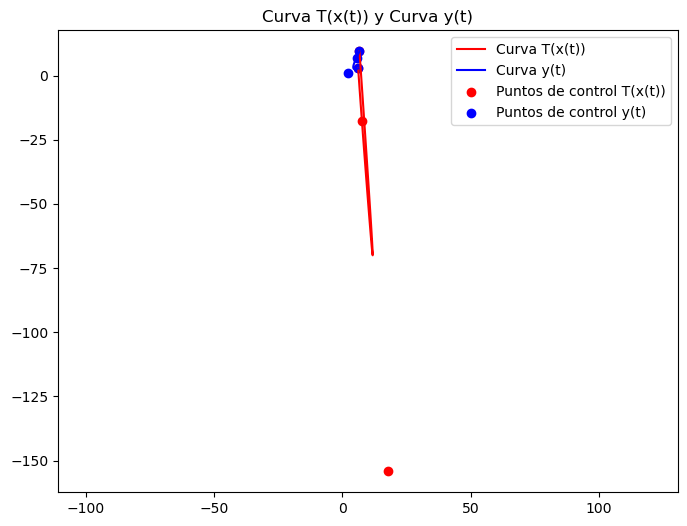

In [11]:
#parte 4 

# Función para calcular la matriz de transformación
def matriz_transformacion(puntos_p, puntos_q):
    p0 = np.array(puntos_p[0])
    p3 = np.array(puntos_p[3])
    q0 = np.array(puntos_q[0])
    q3 = np.array(puntos_q[3])
    if (p0[0] == 0 or p0[1] * p3[0] == p0[0] * p3[1]):
        print("La transformación no es posible")
        return None
    denom = p0[1] * p3[0] - p0[0] * p3[1]
    a = (-1 * p3[1] * q3[0] + p0[1] * q0[0]) / denom
    b = (p3[0] * q3[0] - p0[0] * q0[0]) / denom
    c = (-1 * p3[1] * q3[1] + p0[1] * q0[1]) / denom
    d = (p3[0] * q3[1] - p0[0] * q0[1]) / denom
    return np.array([[a, b], [c, d]])

# Graficar la curva x(t) con sus puntos de control
plt.figure(figsize=(8, 6))
plt.plot(curva1[:, 0], curva1[:, 1], label='Curva x(t)', color='green')
plt.scatter(puntos1[:, 0], puntos1[:, 1], color='green', label='Puntos de control x(t)')
plt.title('Curva x(t) y Puntos de Control')
plt.legend()
plt.axis('equal')
plt.show()

# Graficar la curva y(t) con sus puntos de control
plt.figure(figsize=(8, 6))
plt.plot(curva2[:, 0], curva2[:, 1], label='Curva y(t)', color='blue')
plt.scatter(puntos2[:, 0], puntos2[:, 1], color='blue', label='Puntos de control y(t)')
plt.title('Curva y(t) y Puntos de Control')
plt.legend()
plt.axis('equal')
plt.show()

# Calcular la matriz de transformación
matriz = matriz_transformacion(puntos1, puntos2)

if matriz is not None:
    # Calcular y generar T(x(t))
    nuevos_puntos1 = matriz @ puntos1.T
    nuevos_puntos1 = nuevos_puntos1.T
    curva1_transformada = np.array([bezier(t, nuevos_puntos1) for t in t_values])

    # Graficar la unión de las curvas T(x(t)) e y(t)
    plt.figure(figsize=(8, 6))
    plt.plot(curva1_transformada[:, 0], curva1_transformada[:, 1], label='Curva T(x(t))', color='red')
    plt.plot(curva2[:, 0], curva2[:, 1], label='Curva y(t)', color='blue')
    plt.scatter(nuevos_puntos1[:, 0], nuevos_puntos1[:, 1], color='red', label='Puntos de control T(x(t))')
    plt.scatter(puntos2[:, 0], puntos2[:, 1], color='blue', label='Puntos de control y(t)')
    plt.title('Curva T(x(t)) y Curva y(t)')
    plt.legend()
    plt.axis('equal')
    plt.show()
else:
    print("La transformación no es posible, reintente.")
